# aSPEM Experiment : analysis




TODO: tester qu'à chaque pause, l'agent se réinitialise à $\hat{p}=.5$

In [1]:
%load_ext autoreload
%autoreload 2
#from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
exts = ['.png', '.svg', '.pdf']

In [3]:
%matplotlib inline
fig_width = 15
dpi = 400
from aSPEM import aSPEM
import bayesianchangepoint as bcp

In [4]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [5]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
#COLOR = ['black','dimgrey','grey','darkgrey','silver','rosybrown','lightcoral','indianred','firebrick','brown', 'darkred','red']
list_sujet = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK']

nb_sujet = len(list_sujet)
COLOR = ['b', 'r', 'k', 'g', 'm', 'c',
         'darkblue', 'darkred', 'peru', 'darkgreen', 'darkmagenta', 'darkcyan'] #[(0+(1/nb_sujet)*n, 0, 0, 0.5) for n in range(nb_sujet)]

In [6]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

## Data Scalling

In [7]:
data_scalling = e.Data_Scalling()

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
new_bet = data_scalling['new_bet_full']
new_va = data_scalling['new_va_full']

## Find h

In [9]:
h_bet, h_va = e.Find_h(new_bet, new_va)

AM BMC CS DC FM IP LB OP RS SR TN YK 

In [10]:
fig_width = 15
t_titre = 70
t_label = (30*4)/3

In [11]:
def regress(ax, p, data, c, minx=0, miny=0, maxx=1, maxy=1, t_label=t_label) :
    from scipy import stats
    slope, intercept, r_, p_value, std_err = stats.linregress(p, data)
    x_test = np.linspace(np.min(p), np.max(p), 100)
    fitLine = slope * x_test + intercept
    ax.plot(x_test, fitLine, c=c, linewidth=2)
    
    ax.text(maxx-((maxx-minx)/10), miny+((maxy-miny)/10), 'r = %0.3f\np_value = %0.3f'%(r_, p_value), fontsize=t_label/1.2, ha='right', color=c)
    return ax

In [12]:
def scatter_mean(bet, va, titre, maxx=0.55, maxy=0.25, ex=0.02, ey=0.01, log=False, line_r=True, 
                 ellipse=False, triangle=False, color=False, mean='mean', supp=False, fig_width=10) :
    
    if triangle is True : from matplotlib.patches import Polygon
    
    
    fig, axs = plt.subplots(1, 1, figsize=((fig_width), (fig_width)), constrained_layout=True) #/(1.6180*1))
    
    if type(bet)==dict :
        list_bet, list_va = [], []
        l_100_bet, l_100_va = [], []
        for s in list_sujet :
            list_bet.append(bet[s]) ; list_va.append(va[s])
            l_100_bet.append(h_bet['100'][s]) ; l_100_va.append(h_va['100'][s])
            
        bet, va = list_bet, list_va
    
    m_bet, m_va = [], []
    for x in range(len(bet)):
        if color is False : c = 'k'
        else :              c = color[x]
        
        axs.scatter(l_100_bet[x], l_100_va[x], color=c,  s=25, alpha=0.9)
        
        if triangle is True :
            c_b = ['k', 'grey', 'r']
            for b in range(3) : axs.scatter(bet[x][b], va[x][b], c=c, s=50)
            baba = np.array([[bet[x][y], va[x][y]] for y in range(len(va[x]))])
            poly = Polygon(baba, color=c, alpha=0.2, lw=2)
            axs.add_artist(poly)
            
        if mean=='mean' :      mean_bet, mean_va = np.mean(bet[x]),   np.mean(va[x])
        elif mean=='mediane' : mean_bet, mean_va = np.median(bet[x]), np.median(va[x])           
            
        
        '''if log is False :
            if triangle is True :
                #axs.scatter(mean_bet, mean_va, color=c,  s=50, alpha=0.9)
                axs.text(mean_bet, mean_va, list_sujet[x], fontsize=12, va='center', ha='center')'''
            
        m_bet.append(mean_bet)
        m_va.append(mean_va)

    axs.plot(np.arange(-10,10), np.arange(-10,10), '--k')
    axs.vlines(0.025, -ey, 0.025, colors='k')
    axs.hlines(0.025, -ex, 0.025, colors='k')
    

    axs.set_title(titre, fontsize=t_titre)
    axs.set_xlabel('h$_{bet}$', fontsize=t_label)
    axs.set_ylabel('h$_{v_a}$', fontsize=t_label)
    axs.tick_params(axis='both', labelsize=t_label/1.8)
    
    
    if log:
        axs.set_xscale('log')
        axs.set_yscale('log')
        axs.axis([10**-5.5, 10**0, 10**-2.3, 10**0])
    else :
        axs.axis([-ex ,maxx+ex,-ey,maxy+ey])

    if line_r is True :
        regress(axs, m_bet, m_va, 'r', minx=-ex, miny=-ey, maxx=maxx+ex, maxy=(maxy+ey)/2)
        if supp is True :
            for m_ in [m_va, m_bet, m_va,m_bet] : del m_[np.argmax(m_bet)]
            regress(axs, m_bet, m_va, 'k', minx=0, miny=maxy/2, maxx=maxx, maxy=maxy)
    
    fig.tight_layout()
    #plt.show()
    return fig, axs

In [13]:
COLOR = ['crimson', 'saddlebrown', 'k', 'darkseagreen', 'dimgrey', 'teal',
         'slateblue', 'firebrick', 'peru', 'darkolivegreen', 'goldenrod', 'darkcyan']

Moyenne par Sujet block log


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


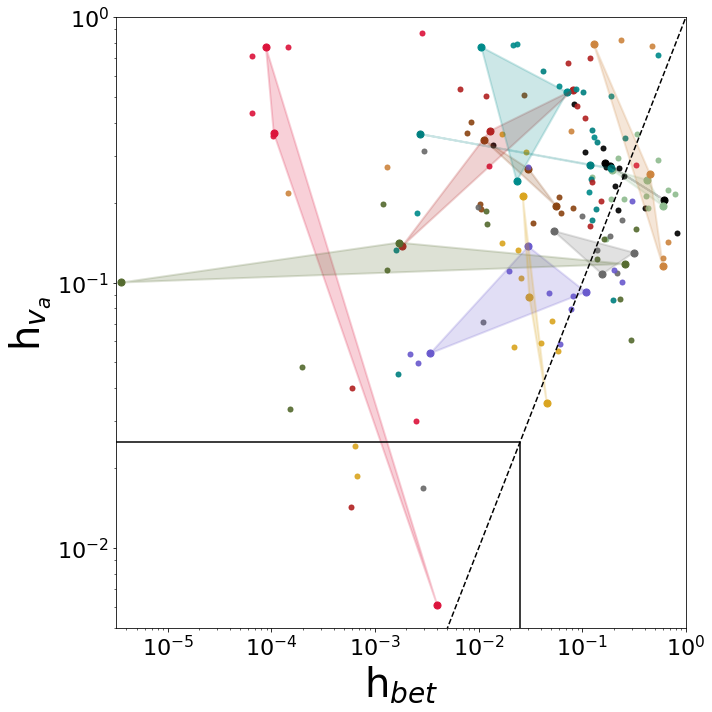

In [14]:
print('Moyenne par Sujet block log')

fig, ax = scatter_mean(h_bet['block'], h_va['block'], '', triangle=True, maxx=1, maxy=1, ex=0.02, ey=0.01,
                       supp=True, color=COLOR, log=True, line_r=False)

#for ext in exts: fig.savefig(f'{msfigpath}/5_inter-individual_differences_fit' + ext, dpi=dpi)

## Calcule MI

In [15]:
Full = e.Full_list()

In [16]:
def mutual_information(hgram):
    """ Mutual information for joint histogram
    https://matthew-brett.github.io/teaching/mutual_information.html"""
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

def mumu(p, data) :
    hist, x_edges, y_edges = np.histogram2d(p, data ,bins=20)
    return mutual_information(hist)

In [17]:
mu_bet,mu_va = [], []
for suj in list_sujet :
    for b in range(3) :
        result = Full[Full.sujet==suj]['results'][200*b:200*(b+1)]
        va = Full[Full.sujet==suj]['va'][200*b:200*(b+1)]
        
        bino = Full[Full.sujet==suj]['bino'][200*b:200*(b+1)]
        
        p_hat_bet, p_hat_va = [], []
        liste = [0,50,100,150,200]
        for s in range(len(liste)-1) :
            
            p_bar, r_bar, beliefs = bcp.inference(np.asarray(bino[liste[s]:liste[s+1]]), h=h_bet['block'][suj][b], p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode='mean')
            p_hat_bet.extend(p_hat)

            p_bar, r_bar, beliefs = bcp.inference(np.asarray(bino[liste[s]:liste[s+1]]), h=h_va['block'][suj][b], p0=.5)
            p_hat, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode='mean')
            p_hat_va.extend(p_hat)
            
        mu_bet.append(mumu(p_hat_bet, result))
        
        proba = np.ma.masked_array(p_hat_va, mask=np.isnan(va.tolist())).compressed()
        data = np.ma.masked_array(va.tolist(), mask=np.isnan(va.tolist())).compressed()

        mu_va.append(mumu(proba, data))

In [18]:
print(np.nanmean(mu_bet), np.nanstd(mu_bet))
print(np.nanmean(mu_va), np.nanstd(mu_va))

1.0255601237296388 0.3418048976669125
0.7426902388779366 0.20955591546288668


In [19]:
HBET, HVA = [], []
for suj in list_sujet :
    print(h_bet['block'][suj], h_va['block'][suj])
    HBET.extend(h_bet['block'][suj])
    HVA.extend(h_va['block'][suj])

[8.875750592452781e-05, 0.00010553346795193304, 0.0039678841331229776] [0.7677858444287345, 0.36471258628292413, 0.0061279927465636205]
[0.030253128376496324, 0.056279964068709123, 0.011198936674609035] [0.26811691443509805, 0.19371609152211505, 0.3450858822273439]
[0.6136494948224532, 0.16694382156151966, 0.18585854999640522] [0.20503770033953897, 0.2818561077742438, 0.27528165420205164]
[0.5946937010154734, 0.42262964765047223, 0.19541785138304937] [0.19476246019941484, 0.24375724165003262, 0.2649306252198145]
[0.31328054179187603, 0.15537802979235008, 0.05284788284590171] [0.12965199961169918, 0.10749801342944947, 0.15648465420416366]
[0.0027371520348586924, 0.11920488333646237, 0.18898813062695496] [0.36211102045302185, 0.27662402964147004, 0.26942039200610407]
[0.003420321134526841, 0.1082056405062763, 0.0300285490270979] [0.054105576512355355, 0.09205767045402626, 0.13672266662100327]
[0.0018363261467048474, 0.012763162493622417, 0.08159631931154003] [0.13728929255953737, 0.37188

In [21]:
print(np.nanmean(HBET), np.nanstd(HBET))
print(np.nanmean(HVA), np.nanstd(HVA))

0.1387997664369719 0.18012915544859032
0.2619282403949119 0.1957761085243669
